In [1]:
from IPython.display import Image

import warnings
warnings.filterwarnings(action = "ignore")

# <a href="https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb">🌴 Binary Classification Tutorial (CLF101) - Level Beginner</a>

**Created using: PyCaret 2.3.6**

**Python version : 3.8.12**

# <span style="color:brown">1. Tutorial Objective</span>

---

현재 과정에서는 PyCaret의 `pycaret.classification` 모듈에 대해서 학습한다.

이번 과정을 통해 아래의 내용들을 배울 수 있다. (단, [PyCaret](https://pycaret.org/)의 공식 홈페이지 [Quick_Start](https://github.com/DaeWang-Ima/Python-PyCaret/blob/main/01_Quick%20Start.ipynb)에서 설명한 함수가 중복되는 경우에는 설명을 생략하도록 한다.)

- **Getting Data:** PyCaret의 저장소로부터 데이터를 불러오는 방법에 대해서 학습한다.

- **Setting up Enviroment:** PyCaret 환경을 설정하는 방법과 분류 모델을 시작하는 방법에 대해서 학습한다.

- **Create Model:** 모델을 생성하고 Stratified Cross Validation을 수행하고 분류 지표를 평가하는 방법에 대해서 학습한다.

- **Tune Model:** 분류 모델의 Hyperparameters들을 자동으로 조정하는 방법에 대해서 학습한다.

- **Plot Model:** 다양한 시각화를 통해 모델의 성능을 분석한다.

- **Finalize Model:** 실험을 마무리한 후 최적의 모델을 완성하는 방법에 대해서 학습한다.

- **Predict Model:** 새로운 데이터를 예측하는 방법에 대해서 학습한다.

- **Save/Load Model:** 나중에 사용하기 위해 모델을 저장하고 불러오는 방법에 대해서 학습한다.

## <span style="color:orange">1.1 For Google colab users</span>

만약 PyCaret을 구글 코랩 환경에서 실행하고자 한다면, 아래의 코드를 먼저 실행시켜주면 된다.

```python
from pycaret.utils import enable_colab
enable_colab()
```

# <span style="color:brown">2. What is Binary Classification?</span>

---

이진 분류(Binary Classification)은 지도학습 머신러닝 기술로, 합격/실패, 긍정/부정 등 이산적(discrete)이고 순서가 없는(unordered) 범주형 클래스 라벨을 예측하는 것을 목표로 한다.

분류를 목표로 하는 실제 사례는 아래의 링크를 통해 확인할 수 있다.

- Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.

- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.

- Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

- [Learn More about Binary Classification](https://categitau.medium.com/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)

# <span style="color:brown">3. Overview of the classification Module in PyCaret</span>

---

PyCaret의 Classification Module(`pycaret.classification`)은 다양한 기술과 알고리즘을 기반으로 관측치들을 이진 그룹으로 분류하는 지도학습 모듈이다.

분류 문제의 일반적인 사용 사례에는 고객 채무 예측(예 혹은 아니오), 고객 이탈 예측(탈퇴 혹은 잔류), 질병 예측(긍정 혹은 부정)이 있다.<br><br>

PyCaret Classification Module은 이진(Binary) 혹은 다중(Multi) 분류 문제에 사용될 수 있다.

Classification Module은 18개 이상의 알고리즘과 모델의 성능을 분석할 수 있는 14개의 시각화 도구를 가지고 있다.

또한, 하이퍼 파라미터 튜닝, 앙상블, 스태킹과 같은 고급 기술 등이 있다.

# <span style="color:brown">4. Dataset for the Tutorial</span>

---

현재 과정에서 사용하고자 하는 데이터는 UCI Machine Learning Repository에서 제공된 **Default of Credit Card Clients Dataset**이다.

해당 데이터는 2005년 4월 부터 2005년 9월까지 대만 신용 카드 고객들의 default payments, demographic factors, credit data, payment history, billing statements를 포함하고 있다.

24,000개의 샘플과 25개의 특징들로 이루어져 있다.

각 변수들의 설명은 아래와 같다.

- **ID:** 각 고객들의 ID

- **LIMIT_BAL:** NT달러로 지정된 신용 금액 (개인 및 가족/추가 금액 포함)

- **SEX:** 성별 (1 = 남성, 2 = 여성)

- **EDUCATION:** (1 = 대학원, 2 = 대학교, 3 = 교등학교, 4 = 기타, 5 = 알 수 없음, 6 = 알 수 없음)

- **MARRIAGE:** 결혼 여부 (1 = 기혼, 2 = 싱글, 3 = 기타)

- **AGE:** 나이

- **PAY_0** to **PAY_6:** n개월 전 상환 여부 (PAY_0 = 지난 달, ... PAY_6 = 6개월 전)

    - [Labels] -1 = 정당한 지불을 한
    
    - [Labels] 1 = 한 달 지연
    
    ...
    
    - [Labels] 9 = 아홉 달 지연 혹은 그 이상


- **BILL_AMT1** to **BILL_AMT6:** n개월 전 고지서 금액 (BILL_AMT1 = 지난 달, ... BILL_AMT6 = 6개월 전)

- **PAY_AMT1** to **PAY_AMT6:** n개월 전 지급 금액 (PAT_AMT1 = 지난 달, ... PAY_AMT6 = 6개월 전)

- **default:** 채무 불이행 (1 = 예, 0 = 아니오) **`Target Column`**<br><br>

해당 데이터 사전은 [여기서](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 찾을 수 있다.

# <span style="color:brown">5. Getting the Data</span>

---

해당 데이터를 위의 링크에서도 다운로드 받을 수 있지만, PyCaret의 `get_data()` 함수를 사용해서 PyCaret의 저장소의 데이터를 불러올 수 있다.

In [2]:
# 필요 라이브러리 불러오기
from pycaret.datasets import get_data

- **get_data()** 함수의 `dataset` 매개변수에 아무 값을 입력해주지 않으면 어떤 데이터를 불러올 수 있는지 확인할 수 있다.

In [3]:
# PyCaret의 데이터 목록 확인
pycaret_datasets = get_data(verbose = False)

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


- `Dataset`을 통해 데이터의 이름을 확인할 수 있다.

- `Default Task`를 통하여 어떤 문제인지 확인할 수 있다.

In [4]:
# Default of Credit Card Clients 데이터 불러오기
dataset = get_data(dataset = "credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


- 위 코드처럼 `dataset` 매개변수에 이름을 인자로 넣어주면 해당 데이터셋을 불러올 수 있다.

- 또한, 이름을 인자로 넣어주면 Pandas의 `head()` 함수를 사용한 결과와 같이 데이터 일부를 확인할 수 있다.

In [5]:
# Check the shape of data
print("Shape of Default of Credit Card Clients Dataset :", dataset.shape)

Shape of Default of Credit Card Clients Dataset : (24000, 24)


- `shape` 메서드를 통해 **24,000**개의 관측치와 **24**개의 변수가 있음을 확인할 수 있다.

다음으로 새로운 데이터에 `predict_model()` 함수를 사용하기 위해, 원본 데이터에서 1,200개의 관측치를 따로 빼주도록 한다.

현재 이렇게 분할하는 과정은 실제 시나리오 시뮬레이션을 위해 수행되므로, 학습/테스트 데이터 분할과 혼동되어서는 안된다.

다시 말하자면, 머신러닝이 실행된 시점에는 1,200개의 관측치들을 사용할 수 없다는 것이다.

In [6]:
# 95% 의 데이터 추출
data = dataset.sample(frac = 0.95, random_state = 786)

# 5% 의 데이터 추출
data_unseen = dataset.drop(data.index)

data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)

print("Data for Modeling :", data.shape, "\n")
print("Unseen Data For Predictions :", data_unseen.shape, "\n")
display(data.head())
display(data_unseen.head())

Data for Modeling : (22800, 24) 

Unseen Data For Predictions : (1200, 24) 



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,270000,2,1,2,34,0,0,2,0,0,...,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
1,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
2,360000,2,1,2,30,0,0,0,0,0,...,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
3,20000,2,1,2,25,0,0,0,0,0,...,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
4,70000,1,2,2,29,0,0,0,0,0,...,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


# <span style="color:brown">6. Setting up Environment in PyCaret</span>

---

`setup()` 함수는 PyCaret 환경을 초기화시키고 변환 파이프라인(transformation pipeline)을 생성하여 모델링 및 도입을 위한 데이터를 준비한다.

`setup()` 함수는 PyCaret의 다른 함수를 실행하기 전에 반드시 불러와야 하는 함수이다.

해당 함수는 필수적으로 두 개의 파라미터를 입력해주어야 하는데, 그 중 하나는 **pandas dataframe**이고 다른 하나는 **예측 컬럼의 이름**이다.

다른 파라미터들은 모두 선택사항이며, 전처리 파이프라인을 커스터마이즈(customize) 하는데 사용된다.<br><br>

그 다음의 자세한 설명은 [01_Quick Start](https://github.com/DaeWang-Ima/Python-PyCaret/blob/main/01_Quick%20Start.ipynb)에 기록되어 있다.

In [7]:
# 필요 라이브러리 불러오기
from pycaret.classification import *

In [8]:
# PyCaret Pipeline 구축
exp_clf101 = setup(data = data, target = "default", session_id = 123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,0
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,0
9,High Cardinality Features,0


**setup** 함수가 정상적으로 실행이 되면 몇 가지 중요한 정보를 포함하고 있는 위와 같은 결과물이 출력된다.

대부분의 정보는 `setup()` 함수가 실행되었을 때 구성된 전처리 파이프라인과 연관되어 있다.

전처리에 관한 대부분의 기능들이 튜토리얼 목적의 범위에서 벗어나기 때문에 다루지 않지만, 이 단계에서 주의해야 할 몇 가지 중요한 사항은 다음과 같다.

- **session_id:** 나중에 재현할 수 있도록 모든 함수에 seed 값을 부여하는 난수이다. 만약 `session_id` 매개변수에 아무 값을 넣어주지 않는다면, 자동으로 임의의 숫자를 부여한다.

- **Target Type:** Binary 혹은 Multiclass를 나타낸다. Binary 혹은 Multiclass 문제에 대해 실험을 수행하는 방식에는 차이가 없다. 모든 기능은 동일하다.

- **Label Encoded:** 예측 변수가 1 혹은 0 대신에 문자열 유형('Yes' 혹은 'No')으로 입력되어 있을 때, 라벨을 자동으로 1과 0으로 자동 인코딩하고 mapping(0: No, 1: Yes)을 참조용으로 표시한다. 현재 과정에서 예측 변수의 유형이 숫자형이기 때문에 라벨을 인코딩해줄 필요가 없다.

- **Original Data:** 원본 데이터의 형태를 보여준다. 현재는 (22800, 24)로 표시되어 있으며 22,800 개의 관측치와 예측 변수를 포함한 24개의 특징들이 있음을 의미한다.

- **Missing Values:** 원본 데이터에 결측치가 존재하는 경우에 해당 부분에 **True**가 보여진다. 현재 데이터에는 결측치가 존재하지 않는다.

- **Numeric Features:** 숫자형으로 추론된 특징들의 개수를 나타낸다. 현재 데이터의 24개 특징 중에서 14개의 특징이 숫자형으로 추론되었다.

- **Categorical Features:** 범주형으로 추론된 특징들의 개수를 나타낸다. 현재 데이터의 24개 특징 중에서 9개의 특징이 범주형으로 추론되었다.

- **Transformed Train Set:** 변환된 학습 데이터의 형태를 보여준다. 원본 데이터의 형태 (22800, 24)는 변환된 학습 데이터에 대해 (15959, 88) 형태로 변환되었으며, 특징이 범주형 변수의 인코딩으로 인해 24개에서 88개로 증가하였다.

- **Transformed Test SEt:** 변환된 테스트 데이터의 형태를 보여준다. 70대 30의 비율이 기본값으로 지정되어 있으며, **setup** 함수의 `train_size` 매개변수를 통해 비율을 변경할 수 있다.

모델링을 수행하기 위해 필요한 몇 가지 처리들이 예를 들면 결측값 대체, 범주형 인코딩 등이 자동으로 수행된다.

`setup()` 함수 대부분의 파라미터들은 선택사항이며, 전처리 파이프라인(pre-processing pipeline) 커스터마이징(customizing) 하는데 사용된다.

현재 과정에서 파라미터들을 자세히 다루지 않지만, 추후 과정에서 좀 더 자세히 다루도록 한다.

# <span style="color:brown">7. Comparing All Models</span>

---

**setup** 함수를 통해 설정이 완료되면 모든 모델의 성능을 비교하여 평가하는 것이 모델링 시작점이다.

`compare_models()` 함수는 모델 라이브러리에 있는 모든 모델들을 학습시키고 평가를 위해 Stratified Cross Validation을 사용하여 점수를 매긴다.

결과물은 교차검증을 통해 나온 평균 Accuray, AUC, Recall, Precision, F1, Kappa, MCC 그리고 훈련 시간을 보여준다.

- **compare_models()** 함수를 사용하기 전에 `models()` 함수를 통해 사용가능한 모델을 확인할 수 있다.

In [9]:
# 사용가능 모델 확인
display(models())

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
# Modeling
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0200
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1030
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,1.1810
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.2720
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.0810
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.4670
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.3610
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.3690
dummy,Dummy Classifier,0.7814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.1410


간단한 코드를 통해 교차검증을 사용하여 14개 이상의 모델을 학습하고 평가한 것을 볼 수 있다.

또한, 오직 비교 목적으로 각 평가 지표에서 최고 성능을 나타내는 부분에 강조 표시가 나타난다.

현재 **Accuracy** 기준 내림차순으로 정렬되어 있으며, `sort` 파라미터를 통해 변경이 가능하다. 예를 들어, `compare_models(sort = "Recall")`인 경우는 **Recall** 기준으로 출력이 된다.

현재 교차검증을 수행할 때 $K$의 기본값은 10이며, `fold` 파라미터를 통해 변경이 가능하다. 예를 들어, `compare_models(fold = 5)`를 지정하면 5 Fold Cross Validation을 수행한다.

$K$의 개수를 줄이면 훈련 시간이 향상된다.

기본적으로 `compare_models()` 함수는 기본 정렬 순서에 따라 성능이 가장 좋은 모델을 반환하지만, `n_select` 파라미터를 통해 상위 N개의 모델을 리스트로 반환할 수 있다.

In [11]:
# 최적의 모델 출력
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# <span style="color:brown">8. Create a Model</span>

---

`create_model()` 함수는 PyCaret의 가장 세밀한 함수이며, PyCaret 기능의 기반이 되는 경우가 많다.

함수 이름에서도 알 수 있듯이 `fold` 파라미터를 통해 교차검증을 사용하여 모델을 학습하고 평가한다.

함수의 결과는 교차검증에 따른 Accuracy, AUC, Recall, Precision, F1, Kappa, MCC를 출력한다.<br><br>

이 튜토리얼의 나머지 부분에서는 아래의 모델들을 후보 모델로 사용한다.

아래의 선택된 모델은 예시를 위한 것일 뿐이며, 현재 데이터에 최적의 성능을 나타내거나 이상적임을 의미하는 것이 아니다.

- Decision Tree Classifier ("dt")

- K Neighbors Classifier ("knn")

- Random Forest Classifier ("rf")

PyCaret 라이브러리에 사용가능한 분류 모델은 18개이다(현재 컴퓨터에서는 CatBoost 알고리즘이 누락되어 있어 17개임).

위에서도 확인하였듯이, `models()` 함수를 사용하여 모든 분류기를 확인할 수 있다.

In [12]:
# 사용가능 모델 확인
display(models())

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## <span style="color:orange">8.1 Decision Tree Classifier</span>

In [13]:
# Decision Tree Classifier 생성
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038
9,0.7442,0.6272,0.4195,0.4148,0.4171,0.2533,0.2533


In [14]:
# 학습된 모델 확인
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## <span style="color:orange">8.2 K Neighbors Classifier</span>

In [15]:
# K Neighbors Classifier 생성
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


In [16]:
# 학습된 모델 확인
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## <span style="color:orange">8.3 Random Forest Classifier</span>

In [17]:
# Random Forest Classifier 생성
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678
9,0.8176,0.7565,0.3621,0.6462,0.4641,0.3645,0.3867


In [18]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


`create_model()` 함수를 통해 출력된 모델의 평균 점수는 `compare_models()` 함수 출력 결과물의 점수와 일치한다.

`compare_models()`를 통해 나온 점수가 Cross Validation을 수행한 평균 점수이기 때문이다.

`compare_models()` 함수와 마찬가지로 `fold` 파라미터를 통해 $K$의 개수를 조정할 수 있다.

예를 들어, `create_model("dt", fold = 5)` 함수를 실행하면 5 Fold Stratified Cross Validation을 수행한다.

# <span style="color:brown">9. Tune a Model</span>

---

`create_model()` 함수를 사용하여 모델을 생성할 때, 모델은 기본값으로 지정된 hyperparameters를 가지고 학습한다.

Hyperparameters를 조정하기 위해서는 `tune_model()` 함수를 사용하면 된다.

해당 함수는 **사전에 정의된 공간**에서 **`Random Grid Search`** 를 사용하여 모델의 hyperparameters를 자동으로 조정한다.

함수의 결과는 교차검증을 수행한 최적의 모델의 Accuracy, AUC, Recall, Precision, F1, Kappa, MCC를 출력한다.

사용자가 지정하여 조정하기 위해서는 `tune_model()`함수의 `custom_grid` 파라미터에 직접 입력해주면 된다.

## <span style="color:orange">9.1 Decision Tree Classifier</span>

In [19]:
# Hyperparameters 조정
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801
9,0.8188,0.7378,0.3075,0.6903,0.4254,0.3362,0.3751


- 기본값으로 정의된 Decision Tree 모델의 정확도는 **0.7293**이였으나, 현재 파라미터가 조정된 모델의 정확도는 **0.8222**로 올라갔음을 확인할 수 있다.

- 각 모델에 사용된 파라미터를 확인해보도록 하자.

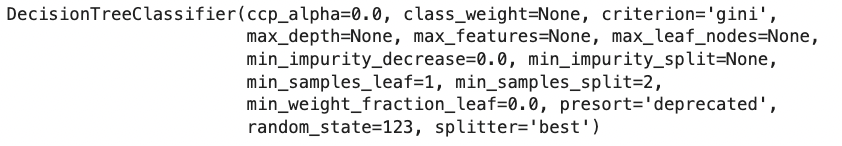

In [20]:
Image("./Images/Default Decision Tree.png", width = 600)

In [21]:
# Hyperparameters를 조정하여 학습된 모델 확인
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


- 두 모델의 파라미터를 비교해보면 `criterion, max_depth, max_features` 등이 조정되었음을 확인할 수 있다.

## <span style="color:orange">9.2 K Neighbors Classifier</span>

- 이번에는 `tune_model()` 함수의 `custom_grid` 파라미터를 사용하여 조정할 파라미터를 직접 입력해보도록 하자.

- 입력해줄 때는 dictionary 타입으로 입력해주면 된다.

In [22]:
# 필요 라이브러리 불러오기
import numpy as np

In [23]:
# Hyperparameters 조정
tuned_knn = tune_model(knn, custom_grid = {"n_neighbors" : np.arange(0, 50, 1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146
9,0.7881,0.6426,0.0661,0.6389,0.1198,0.0822,0.1548


- 위의 코드에서 `np.arange(0, 50, 1)`이 의미하는 것은 0 부터 50 까지 1 간격으로 배열을 생성하라는 뜻이다.

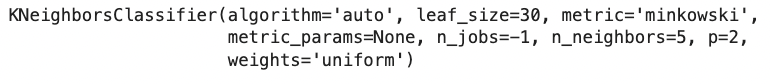

In [24]:
Image("./Images/Default Neighbors.png", width = 600)

In [25]:
# Hyperparameters를 조정하여 학습된 모델 확인
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


- K Neighbors 모델에서는 `n_neighbors` 파라미터만 조정했기 때문에 해당 파라미터의 값만 변경되었음을 확인할 수 있다.

## <span style="color:orange">9.3 Random Forest Classifier</span>

In [26]:
# Hyperparameters 조정
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7530,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699
9,0.8207,0.7484,0.3132,0.6987,0.4325,0.3439,0.3831


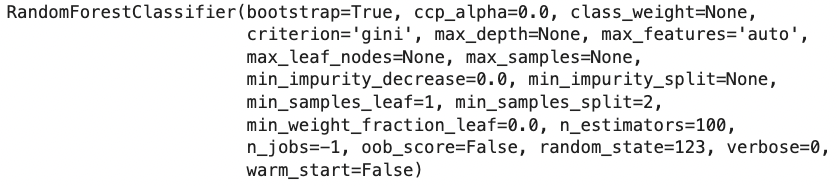

In [27]:
Image("./Images/Default Random Forest.png", width = 600)

In [28]:
# Hyperparameters를 조정하여 학습된 모델 확인
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


`tune_model()` 함수는 `Accuracy` 기본값으로 하여 최적화를 수행하지만, **`optimizer`** 파라미터를 통해 변경할 수 있다.

예를 들어, `tune_model(dt, optimize = "AUC")`는 `Accuracy` 대신에 `AUC`의 결과가 가장 높은 Decision Tree의 hyperparameters를 찾을 것이다.

현재 과정에서는 단순화하기 위해서 `Accuracy`만을 기준으로 하여 사용하였다.

일반적으로 데이터가 불균형인 경우 `Accuracy`는 적절한 평가 요소가 아니다.

분류 결과를 평가하기 위해 옳바른 지표를 선택하는 방법론은 현재 튜토리얼에서 다루지 않지만, 자세한 내용은 [여기를](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) 클릭하여 올바른 평가 지표를 선택하는 방법에 대한 기사를 참조하면 된다.<br><br>

최적의 모델을 생성할 때, 고려해야 할 기준은 평가 지표뿐만이 아니다.

기타로 고려해야 할 요소는 학습 시간, KFold 표준편차 등이 있다.

앞으로 추후 진행하는 과정들에서 그러한 요소들에 대해서 다룰 것이며, 현재 과정에서는 `tuned_rf` 모델을 최적의 모델이라고 생각하고 진행하도록 하자.

# <span style="color:brown">10. Plot a Model</span>

---

모델링을 마무리하기 전에, `plot_model()` 함수를 사용하면 AUC, confusion_matrix, decision boundary 등 여러 측면의 성능을 분석할 수 있다.

해당 함수는 훈련된 모델의 객체를 입력으로 받으며 테스트/홀드아웃 데이터를 기준으로 시각화를 반환한다.<br><br>

15개의 서로 다른 시각화를 가지고 있으며, 사용 가능한 시각화 목록은 `plot_model()` docstring을 참조해야 한다.

## <span style="color:orange">10.1 AUC Plot</span>

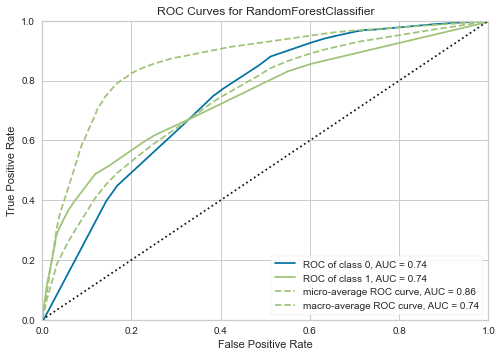

In [29]:
# AUC 시각화
plot_model(tuned_rf, plot = "auc")

- `AUC (Area Under the ROC Curve)`는 **ROC Curve**의 밑면적을 의미한다.

- ROC Curve의 x축은 **FPR (False Positive Rate)** 이고, y축은 **TPR (True Positive Rate)** 이며, ROC Curve는 확률 임곗값마다 TPR과 FPR을 나타낸다.

- **TPR**은 전체 양성 샘플 중에 양성으로 예측된 것의 비율을 나타내며, **FPR**은 전체 음성 샘플 중에 양성으로 잘못 예측된 것의 비율을 나타낸다.

- **즉,TPR은 1에 가까울 수록 좋고, FPR은 0에 가까울 수록 좋은 모델이다.**

- 하지만 임곗값이 커지면 양성으로 예측되는 경우가 적어지기 때문에 TPR과 FPR 모두 작아질 수 밖에 없다.

- <span style="color:red">따라서 FPR의 값이 작아질 때 TPR이 천천히 작아진다면, 좋은 성능을 가진 모델이라고 판단할 수 있다.</span>

- 그러한 경우에는 곡선 아래의 넓이가 정사각형 넓이인 1에 가까워질 것이다.

- 이러한 개념을 바탕으로 ROC Curve의 밑면적인 AUC를 구해 모델의 성능을 판단하는 것이다.

[참고 사이트](https://bskyvision.com/1165)

## <span style="color:orange">10.2 Precision-Recall Curve</span>

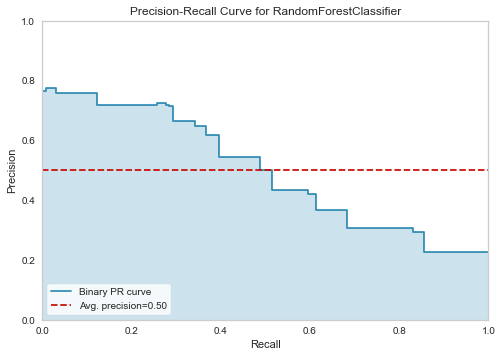

In [30]:
# Precision-Recall Curve 시각화
plot_model(tuned_rf, plot = "pr")

## <span style="color:orange">10.3 Feature Importance Plot</span>

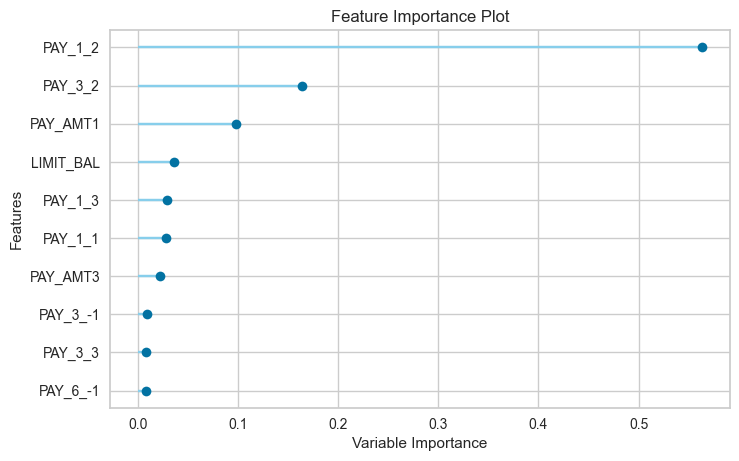

In [31]:
# Feature Importance 시각화
plot_model(tuned_rf, plot = "feature")

## <span style="color:orange">10.4 Confusion Matrix</span>

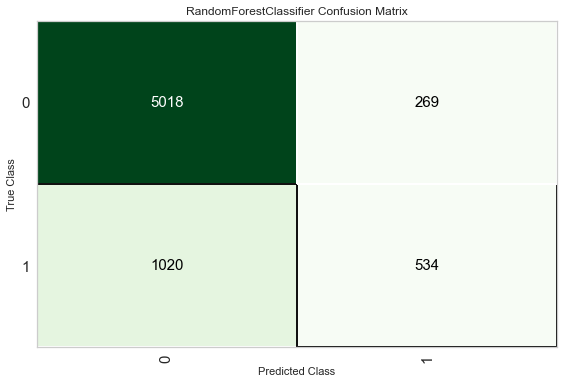

In [33]:
# Confusion Matrix 시각화
plot_model(tuned_rf, plot = "confusion_matrix")

- **`Confusion Matrix`** 란 모델의 성능을 측정하기 위해 예측값과 실제값을 비교하기 위한 표이다.

- 만약 여기서 0을 Positive, 1을 Negative 라고 한다면 맨위의 왼쪽부터 TP(True Positive), FN(False Negative), FP(False Positive), TN(True Negative) 이다.

- **TP (True Positive)** 의 개수 `5,018개`

- **FN (False Negative)** 의 개수 `269개`

- **FP (False Positive)** 의 개수 `1,020개`

- **TN (True Negative)** 의 개수 `534개`<br><br>

- **Confusion Matrix**를 통해 여러 지표의 값을 알 수 있으며, 현재 과정에서 `정확도(Accuracy), 정밀도(Precision), 재현도(Recall)` 3가지에 대해서 알아보도록 하자.<br><br>

<span style="color:blue">**Accuracy**</span>

- 정확도는 올바르게 예측된 샘플의 비율을 말한다.

$$정확도(Accuracy) = \frac{TP + TN}{TP + FN + FP + TN}$$

- 위의 결과에서의 정확도는 다음과 같다.

$$Accuracy = \frac{5018 + 534}{5018 + 269 + 1020 + 534} = 0.8116$$<br><br>

<span style="color:blue">**Precision**</span>

- 정밀도는 모델이 Positive라고 예측한 샘플 중에서 실제값이 Positive인 비율을 말한다.

- 즉, 현재 과정에서 0을 Positive라고 하였으니, 정밀도는 0으로 예측한 값 중에서 실제 0의 비율이다.

$$정밀도(Precision) = \frac{TP}{TP + FP}$$

- 위의 결과에서의 정밀도는 다음과 같다.

$$Precision = \frac{5018}{5018 + 1020} = 0.8311$$<br><br>

<span style="color:blue">**Recall**</span>

- 재현도는 실제값이 Positive인 것 중에서 모델이 Positive라고 예측한 비율을 말한다.

- 재현도를 통하여 모델이 Positive 샘플을 얼마나 잘 분류하는지 알 수 있다.

$$재현도(Recall) = \frac{TP}{TP + FN}$$

- 위의 결과에서의 재현도는 다음과 같다.

$$Recall = \frac{5018}{5018 + 269} = 0.9491$$<br><br>

다음으로, 훈련된 모델의 성능을 분석하는 또 다른 방법으로는 `evaluate_model()` 함수가 있으며, 해당 함수는 주어진 모델에 사용가능한 시각화를 모두 보여준다.

In [49]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

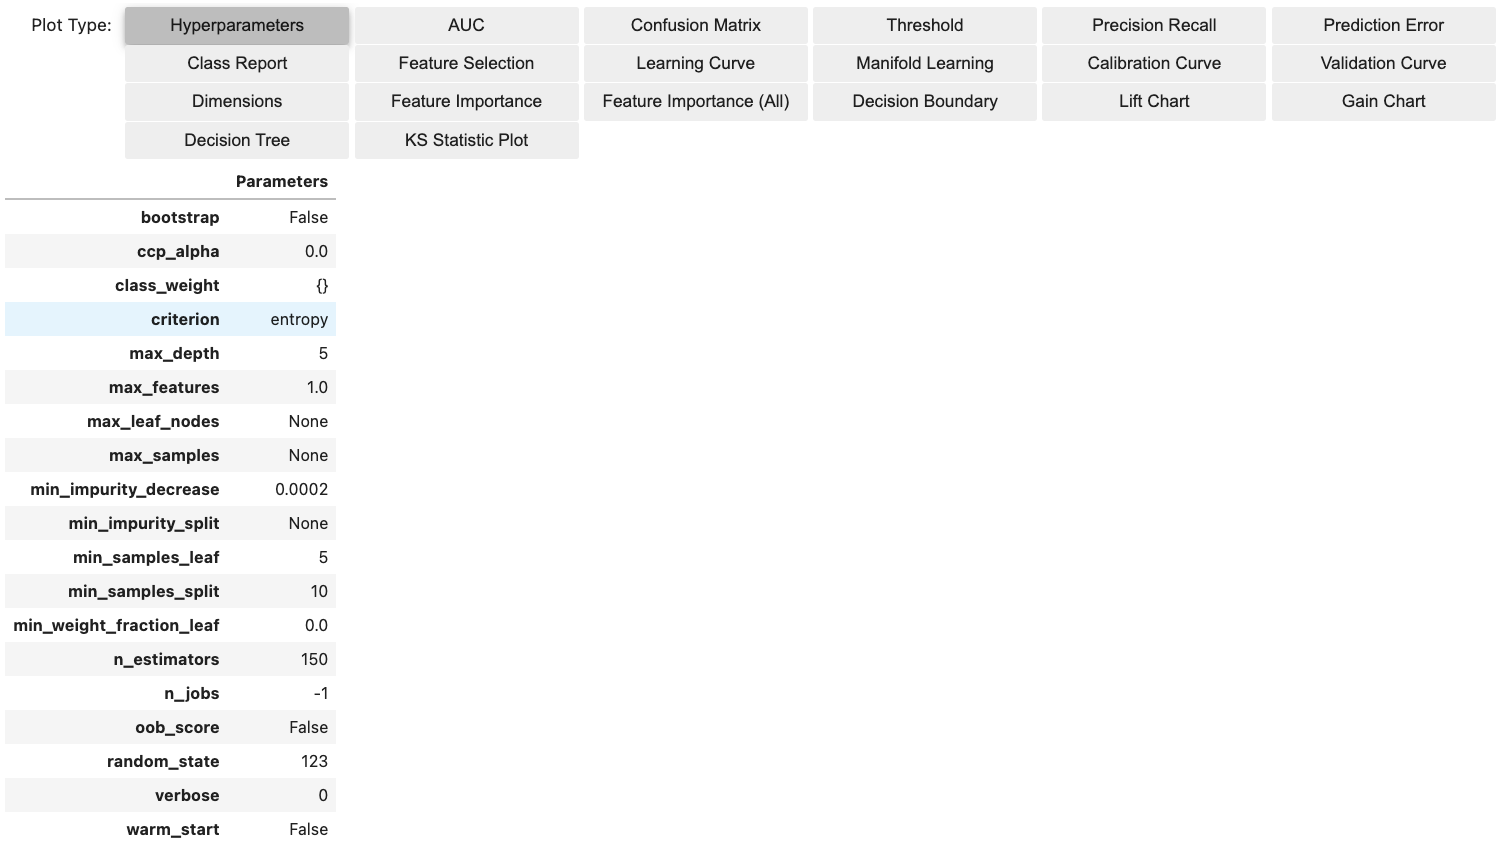

In [53]:
Image("./Images/Evaluate Model Plot.png", width = 900)

# <span style="color:brown">11. Predict on test/hold-out Sample</span>

---

모델링을 마무리하기 전에, 테스트/홀드아웃 데이터를 예측하고 평가 지표를 검토하여 최종적으로 점검을 수행하는 것이 좋다.

위의 목차 6의 정보를 보면, 30% (6,841개)의 데이터가 테스트/홀드아웃 데이터로 분리되어 있음을 확인할 수 있다.

위에서 설명된 모든 평가 지표들은 학습 데이터(70%) 만을 기반으로 한 교차검증 결과이다.

이제 `tuned_rf` 변수에 저장된 최종 모델을 사용하여 홀드아웃 데이터를 예측하고 지표를 평가하여 Cross Validation 결과와 다른지 확인해보도록 하자. 

In [36]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


Cross Validation의 정확도는 **`0.8203`** 이며, 30% 데이터에 대한 예측 정확도는 **`0.8116`** 이다. 큰 차이가 나지 않음을 알 수 있다.

만약 Cross Validation의 결과와 테스트 데이터의 결과에 큰 차이가 있다면, 일반적으로 과적합을 나타내지만 다른 여러 요인에 의한 것일 수 있으므로 추가적인 조사가 필요하다.

이 경우에는 모델 최종화 단계를 거치고 앞에서 정의한 `unseen data`를 예측하도록 한다.

# <span style="color:brown">12. Finalize Model for Deployment</span>

Model Finalization은 마지막 단계이다.

PyCaret의 일반적인 머신러닝 작업 흐름은 `setup()` 함수로 시작하며, `compare_modelS()` 함수를 통해 모델을 비교하고 hyperparameters tuning, ensembling, stacking 등 여러 모델링 기법을 사용하기 위해 몇 가지 후보 모델을 명단에 올린다.

위의 작업 흐름은 새로운 데이터를 예측하기 위한 최적의 모델을 생성할 수 있을 것이다.

`finalize_model()` 함수는 테스트/홀드아웃 데이터를 포함한 완전한 데이터에 모델을 적합시킨다.

`finalize_model()` 함수는 실제로 모델이 사용되기 전에 완전한 데이터에 모델을 학습시키기 위한 목적을 가지고 있다.

In [37]:
# Model Finalization
final_rf = finalize_model(tuned_rf)

In [38]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


<span style="color:red">🔥 **Caution**</span>

일단 `finalize_model()` 함수를 사용하여 모델이 완성되면, 전체 데이터는 모델 학습을 위해 사용된다.

따라서 모델이 `finalize_model()` 함수를 사용한 후 테스트 데이터에 대한 예측에 사용되는 경우, 출력된 결과들은 모델링에 사용된 동일한 데이터를 예측하므로 해석의 오류가 있다.

해석의 오류가 발생할 수 있다는 점을 설명하기 위해, `predict_model()` 함수에 `final_rf` 객체를 입력으로 넣어서 결과를 확인해보도록 하자.

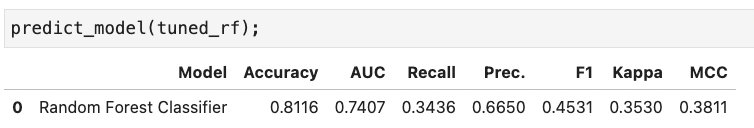

In [44]:
Image("./Images/Section 11 Predict model.png", width = 600)

In [43]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


동일한 모델임에도 불구하고 AUC의 값이 **`0.7407`** 에서 **`0.7526`** 으로 증가했음을 볼 수 있다.

이러한 이유는 `final_rf` 객체가 테스트/홀드아웃 데이터를 포함한 완전한 데이터로 학습이 되었기 때문이다.

# <span style="color:brown">13. Predict on unseen data</span>

---

`predict_model()` 함수는 새로운 데이터를 예측하는데도 사용된다.

목록 11과의 차이점은 `data` 파라미터에 `data_unseen`을 인자로 넣어준다는 것이다.

`data_unseen` 변수는 해당 튜토리얼을 시작할 때 만들어줬던 변수이며, 원본 데이터의 5%를 차지하고 있다.

In [50]:
print("Shape of unseen data :", data_unseen.shape, "\n")

# 새로운 데이터 예측
unseen_predictions = predict_model(final_rf, data = data_unseen)

print("Shape of predicted unseen data :", unseen_predictions.shape, "\n")
display(unseen_predictions.head())

Shape of unseen data : (1200, 24) 

Shape of predicted unseen data : (1200, 26) 



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


위의 결과를 보면 `Label`과 `Score` 변수가 `data_unseen` 데이터에 추가된 것을 볼 수 있다.

현재 이진 분류 문제이기 때문에 **Label**은 예측값을 의미하고, **Score**은 예측값이 나올 확률을 의미한다.

모든 변환이 백그라운드에서 자동으로 수행되는 동안 예측된 결과가 원래 데이터에 연결된다.

실제값을 나타내는 `default` 변수가 있으므로 평가 지표를 확인할 수 있다..

해당 과정을 진행하기 위해서는 `pycaret.utils` 모듈을 사용해야 한다.

In [56]:
# 필요 라이브러리 불러오기
from pycaret.utils import check_metric

In [57]:
# 정확도 출력
check_metric(unseen_predictions["default"], unseen_predictions["Label"], metric = "Accuracy")

0.8167

# <span style="color:brown">14. Saving the model</sapn>

---

이제 `final_rf` 변수에 저장되어 있는 `tuned_rf` 모델을 완성시킴으로써 모든 과정을 마쳤다.

또한, `final_rf` 변수에 저장되어 있는 모델을 사용하여 `data_unseen`을 예측하였다.

위 과정을 통해 모든 과정을 마쳤지만, 다음과 같은 질문이 있다.

- 만약 예측해야 할 새로운 데이터가 더 많이 생겨나면 어떻게 해야할까?

- 앞선 과정들을 다시 반복해야 하는 것인가?

**아니다.** PyCaret의 내장된 함수 `save_model()`를 사용하면 전체 변환 파이프라인과 함께 모델을 저장하여 나중에 사용할 수 있다.

In [59]:
# 모델 저장
save_model(final_rf, "./Save Model/Final RF Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

- 경로를 직접 지정해줄 수 있으며, 위의 코드를 실행하면 자동으로 저장이 된다.

- 아래 사진을 통해 원하는 경로에 모델이 저장되었음을 확인할 수 있다.

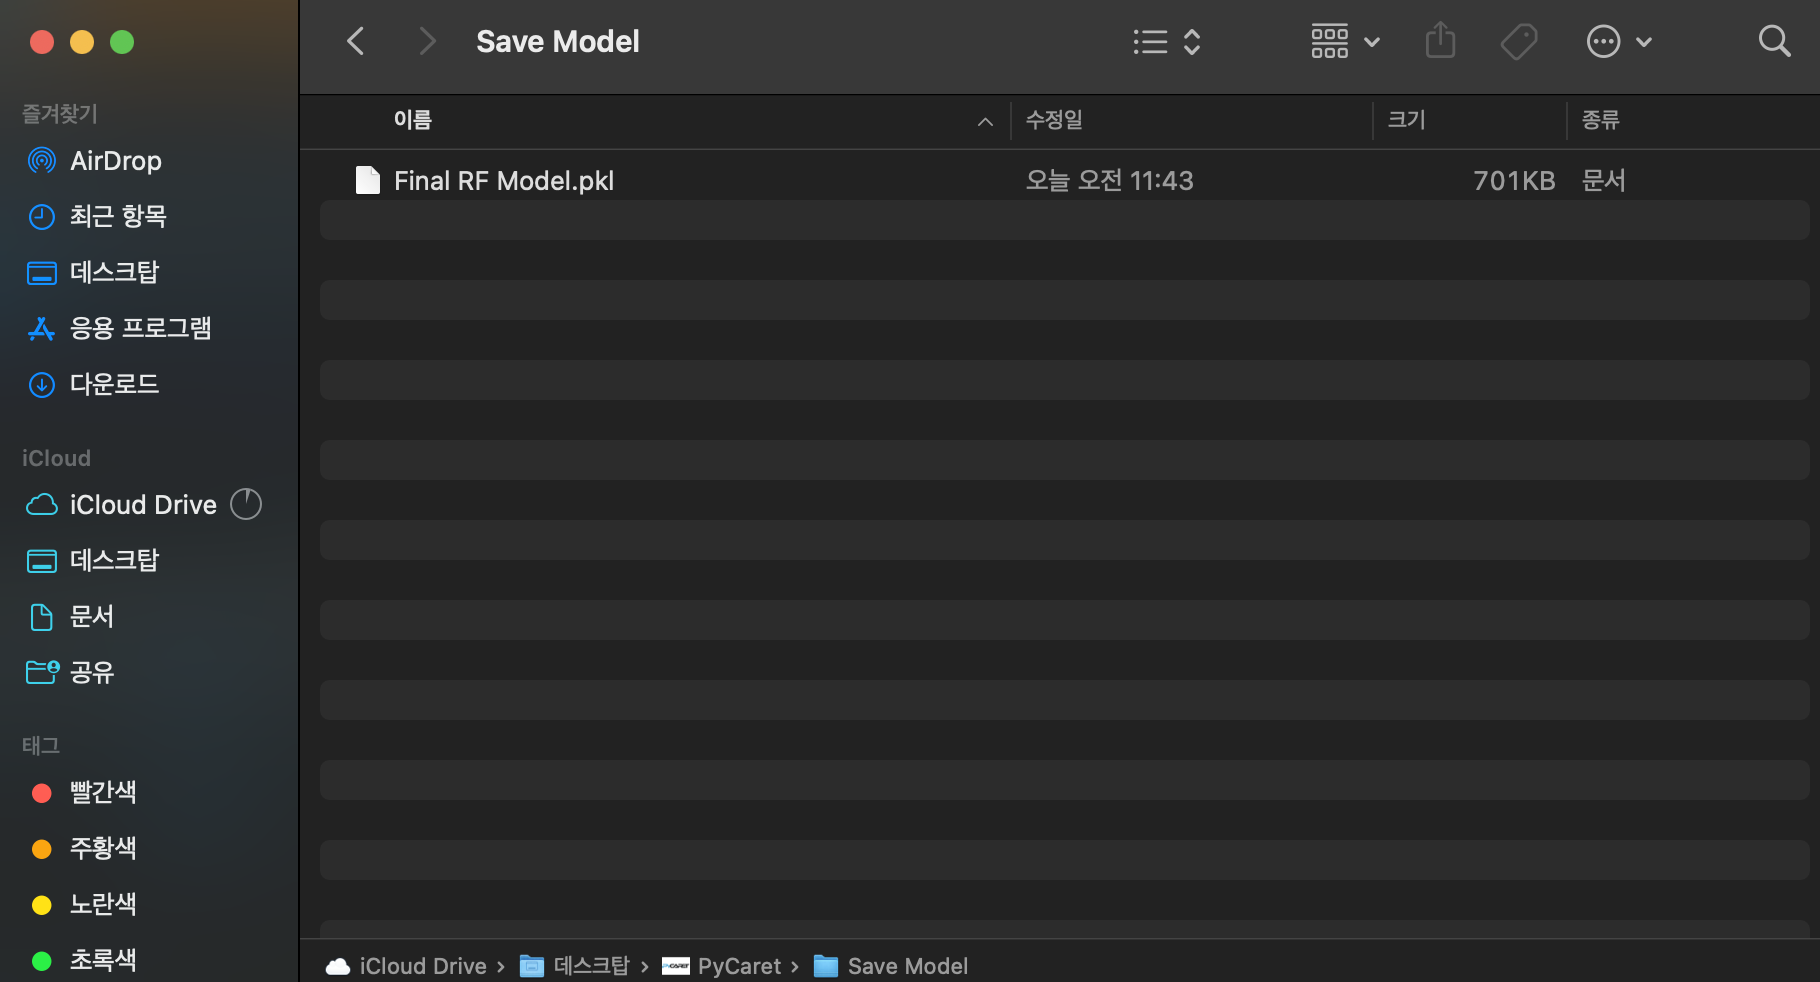

In [63]:
Image("./Images/Save Model.png", width = 800)

# <span style="color:brown">15. Loading the saved model</span>

---

동일한 환경 혹은 대체 환경에서 미래에 저장된 모델을 불러오기 위해서, PyCaret의 `load_model()` 함수를 통해 불러오고 저장된 모델을 새로운 데이터에 쉽게 적용하여 예측한다.

In [64]:
# 모델 불러오기
save_final_rf = load_model("./Save Model/Final RF Model")

Transformation Pipeline and Model Successfully Loaded


일단 모델이 해당 환경에서 불러와지면, `predict_model()` 함수를 사용하여 새로운 데이터를 간편하게 예측할 수 있다.

목차 13에서 진행하였던 `data_unseen` 데이터를 예측해보도록 하자.

In [65]:
new_prediction = predict_model(save_final_rf, data = data_unseen)

print("Shape of new predicted unseen data :", new_prediction.shape, "\n")
display(new_prediction.head())

Shape of new predicted unseen data : (1200, 26) 



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


In [66]:
check_metric(new_prediction["default"], new_prediction["Label"], metric = "Accuracy")

0.8167

- 정확도의 값은 `0.8167`로 목차 13의 결과와 같음을 볼 수 있다.